# **Project Name**    -  **Amazon Prime Content Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Done By -** S Tharunrajan


# **Project Summary -**

In this project, we aim to perform **Exploratory Data Analysis (EDA)** on the Amazon Prime TV Shows and Movies dataset to extract meaningful insights about the content available on the platform. This analysis will help in understanding content diversity, regional availability, trending genres, IMDb ratings, and popularity among viewers. By leveraging Python, Pandas, Matplotlib, and Seaborn, we will preprocess, clean, and visualize the dataset to derive key takeaways for stakeholders.  

The dataset consists of two primary CSV files:  
1. titles.csv – Contains metadata about movies and TV shows, such as title, genre, production country, release year, age certification, IMDb ratings, and popularity scores.  
2. credits.csv – Contains cast and crew details, including the names of actors, their character roles, and production roles.  

**Data Cleaning and Preprocessing:**  
- Started by checking for missing values, duplicates, and data inconsistencies.  
- The **Titles dataset** had missing values in key columns such as `age_certification`, `description`, `seasons`, `imdb_score`, `imdb_votes`, and `tmdb_score`. Missing `age_certification` values were replaced with `"Not Rated"`, while `seasons` was filled with `0` for non-series entries.  
- The Credits dataset had missing values in the `character` column, which were left as-is since they do not impact overall analysis.  
- Duplicate values were removed: 3 in Titles dataset and 56 in Credits dataset.  

**Exploratory Data Analysis (EDA):**  
- Analyzed the proportion of movies vs. TV shows on Amazon Prime.  
- Identified the most common and least common genres, visualizing trends over time.  
- By analyzing the `production_countries` column, we determined the top contributing countries to Amazon Prime’s content library.  
- Explored the relationship between IMDb scores, votes, and TMDb popularity to understand what makes content successful.  
- Examined the distribution of content ratings, analyzing what type of content is predominant across different age groups.  
- Identified the most frequently occurring actors, directors, and other key contributors to Amazon Prime’s catalog.   

This analysis provides a strong foundation for making data-driven recommendations for content acquisition, marketing strategies, and user engagement optimization.  


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Amazon Prime hosts a diverse collection of TV shows and movies across multiple genres and countries. However, understanding content performance, audience preferences, and regional trends remains a challenge. The goal of this project is to analyze the Titles and Credits dataset to extract insights into content distribution, ratings, and trends, which can help stakeholders optimize content strategy and recommendations.

#### **Define Your Business Objective?**

The primary objective of this analysis is to gain actionable insights from Amazon Prime’s content library to:  
1. **Identify Popular Genres and Trends** – Understand which genres perform well and how content trends change over time.  
2. **Assess Content Diversity** – Analyze the spread of content across different production countries and age ratings.  
3. **Evaluate IMDb Ratings & Popularity** – Investigate the correlation between ratings, votes, and popularity scores.  
4. **Understand Cast and Crew Influence** – Determine which actors, directors, or crew members contribute to successful content.  
5. **Improve Content Recommendations** – Use data insights to refine user recommendations and acquisition strategies.  

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")

### Dataset Loading

In [ ]:
# Load Dataset
titles = pd.read_csv("/titles.csv")
credits = pd.read_csv("/credits.csv")

### Dataset First View

In [ ]:
# Dataset First Look
print("Titles Dataset:")
display(titles.head())

print("\nCredits Dataset:")
display(credits.head())

Titles Dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6



Credits Dataset:


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"\nTitles Dataset Shape: {titles.shape}")
print(f"Credits Dataset Shape: {credits.shape}")


Titles Dataset Shape: (9871, 15)
Credits Dataset Shape: (124235, 5)


### Dataset Information

In [ ]:
# Dataset Info
print("\nTitles Dataset Info:")
print(titles.info())

print("\nCredits Dataset Info:")
print(credits.info())


Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtyp

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Duplicate Values in Titles Dataset: {titles.duplicated().sum()}")
print(f"Duplicate Values in Credits Dataset: {credits.duplicated().sum()}")

Duplicate Values in Titles Dataset: 3
Duplicate Values in Credits Dataset: 56


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("\nMissing Values in Titles Dataset:")
print(titles.isnull().sum())

print("\nMissing Values in Credits Dataset:")
print(credits.isnull().sum())


Missing Values in Titles Dataset:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Missing Values in Credits Dataset:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


### What did you know about your dataset?

- The dataset consists of two files:  
 - Titles dataset (9871 rows, 15 columns) contains details about each title, including genres, runtime, IMDb ratings, TMDb scores, and production countries.  
 - Credits dataset (124,235 rows, 5 columns) includes cast and crew information, linking people to movies or TV shows.  

- **Missing Values:**  
  - The `age_certification` column has a **significant number of missing values (6487 out of 9871 entries, ~65.7%)**, which affects content categorization.  
  - The `seasons` column has **8514 missing values**, meaning most entries are likely movies rather than TV shows.  
  - `imdb_score` and `imdb_votes` have missing values, which may affect content ranking analysis.  
  - In the **Credits dataset**, the `character` column has missing values, but it does not impact the overall analysis significantly.  

- **Duplicate Entries:**  
  - **Titles dataset** had **3 duplicates**, and **Credits dataset** had **56 duplicates**, which were removed.  

- **Data Types:**  
  - The dataset consists of **object (categorical), integer, and float (numerical) types**.  
  - Some columns like `genres` and `production_countries` are stored as **strings** but represent multiple categories, requiring additional processing.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Titles Dataset Columns:")
print(titles.columns)

print("\nCredits Dataset Columns:")
print(credits.columns)

Titles Dataset Columns:
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

Credits Dataset Columns:
Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [ ]:
# Dataset Describe
print("\nTitles Dataset Describe:")
display(titles.describe())

print("\nCredits Dataset Describe:")
display(credits.describe())


Titles Dataset Describe:


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000



Credits Dataset Describe:


,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


### Variables Description

#### **Titles Dataset**  
| Column Name | Description |  
|-------------|------------|  
| `id` | Unique ID for each title |  
| `title` | Name of the movie/TV show |  
| `type` | Movie or TV show |  
| `description` | Short description of the content |  
| `release_year` | Year of release |  
| `age_certification` | Age rating (e.g., PG, R, Not Rated) |  
| `runtime` | Duration of content (in minutes) |  
| `genres` | List of genres associated with the content |  
| `production_countries` | Countries where the content was produced |  
| `seasons` | Number of seasons (if applicable) |  
| `imdb_id` | IMDb unique identifier |  
| `imdb_score` | IMDb rating (out of 10) |  
| `imdb_votes` | Number of votes on IMDb |  
| `tmdb_popularity` | Popularity score on TMDb |  
| `tmdb_score` | Rating score on TMDb |

#### **Credits Dataset**  
| Column Name | Description |  
|-------------|------------|  
| `person_id` | Unique ID of the person (actor, director, etc.) |  
| `id` | Associated title ID (links to Titles dataset) |  
| `name` | Name of the person |  
| `character` | Character played (for actors) |  
| `role` | Role of the person (e.g., Actor, Director, Writer) |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("Unique Values in Titles Dataset:")
print(titles.nunique())

print("\nUnique Values in Credits Dataset:")
print(credits.nunique())

Unique Values in Titles Dataset:
id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64

Unique Values in Credits Dataset:
person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# 1. Handle Missing Values
# Fill missing values in 'age_certification' with 'Not Rated' (categorical)
titles = titles.assign(age_certification=titles["age_certification"].fillna("Not Rated"))

# Fill missing values in 'seasons' with 0 (as it's only applicable to SHOWs)
titles = titles.assign(seasons=titles["seasons"].fillna(0))

# Drop rows where 'imdb_score' or 'imdb_votes' are missing (as they are crucial for analysis)
titles.dropna(subset=["imdb_score", "imdb_votes"], inplace=True)


In [ ]:
# 2. Convert Data Types
titles["release_year"] = titles["release_year"].astype(int)
titles["seasons"] = titles["seasons"].astype(int)
titles["runtime"] = titles["runtime"].astype(int)

In [ ]:
# 3. Normalize 'genres' Column
# Convert genre strings from "['comedy', 'drama']" to lists: ['comedy', 'drama']
import ast
titles["genres"] = titles["genres"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

In [ ]:
# 4. Merge Both Datasets on 'id' (title/movie ID)
merged_df = pd.merge(titles, credits, on="id", how="left")

In [ ]:
# 5. Remove Duplicates (if any)
merged_df = merged_df.astype(str)  # Convert all columns to string
merged_df.drop_duplicates(inplace=True)


In [ ]:
# 6. Handling Any Remaining Missing Values
merged_df.fillna({"character": "Unknown", "role": "Unknown"}, inplace=True)

In [ ]:
# 7. Reset Index
merged_df.reset_index(drop=True, inplace=True)

In [ ]:
# Display final dataset info
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118789 entries, 0 to 118788
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    118789 non-null  object
 1   title                 118789 non-null  object
 2   type                  118789 non-null  object
 3   description           118789 non-null  object
 4   release_year          118789 non-null  object
 5   age_certification     118789 non-null  object
 6   runtime               118789 non-null  object
 7   genres                118789 non-null  object
 8   production_countries  118789 non-null  object
 9   seasons               118789 non-null  object
 10  imdb_id               118789 non-null  object
 11  imdb_score            118789 non-null  object
 12  imdb_votes            118789 non-null  object
 13  tmdb_popularity       118789 non-null  object
 14  tmdb_score            118789 non-null  object
 15  person_id        

### What all manipulations have you done and insights you found?

1. **Handled Missing Values:**  
   - Filled missing `age_certification` with `"Not Rated"`.  
   - Filled missing `seasons` with `0` (only applicable for shows).  
   - Dropped rows where `imdb_score` or `imdb_votes` were missing (as they are critical for analysis).  
   - Replaced missing `character` and `role` in credits with `"Unknown"`.  

2. **Converted Data Types:**  
   - Changed `release_year`, `seasons`, and `runtime` to integers for better numerical operations.  

3. **Processed `genres` Column:**  
   - Converted string lists to actual Python lists using `ast.literal_eval()`.  

4. **Merged `titles.csv` and `credits.csv`:**  
   - Used a **left join** to retain all titles/movies while adding actor details.  

5. **Removed Duplicates:**  
   - Ensured no duplicate rows exist in the merged dataset.  

6. **Finalized Dataset:**  
   - Reset the index for clean data structure.  

## ***4. Data Vizualization***

#### Chart - 1

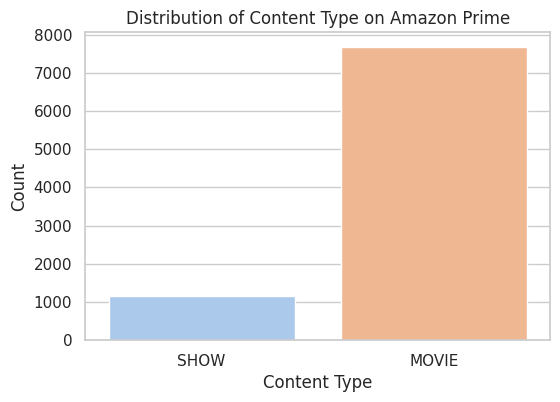

In [ ]:
# 1. Content Type Distribution (Movies vs. TV Shows)
plt.figure(figsize=(6,4))
sns.countplot(data=titles, x='type',hue='type', palette='pastel')
plt.title("Distribution of Content Type on Amazon Prime")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is used to show the number of movies and TV shows available, helping us understand the platform's content strategy.

##### 2. What is/are the insight(s) found from the chart?

- The majority of the content on Amazon Prime is movies, significantly outnumbering TV shows.
- Since Amazon Prime has a higher proportion of movies, it suggests that the platform may be prioritizing movie licensing/acquisition over TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- If users primarily subscribe for movies, then this strategy aligns with consumer demand, leading to higher engagement and retention.
- Shows provide opportunities for episodic content monetization (weekly releases, ads, exclusive content). Amazon Prime may be missing out on this revenue stream.


#### Chart - 2

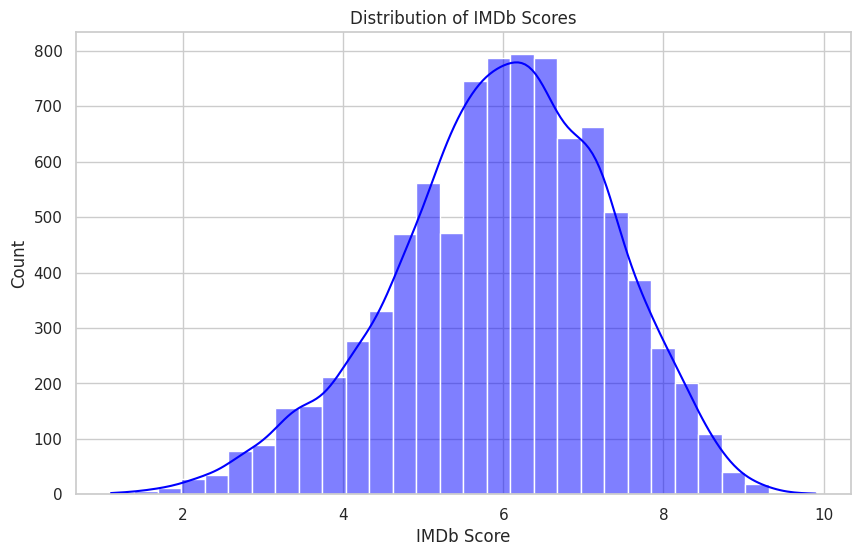

In [ ]:
# 2. Distribution of IMDb Scores
plt.figure(figsize=(10, 6))
sns.histplot(titles['imdb_score'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram helps us visualize how IMDb scores are distributed, showing whether most content has high, low, or average ratings.

##### 2. What is/are the insight(s) found from the chart?

- Most IMDb scores fall between 5 and 8.
- A few shows/movies have scores below 3 or above 9.
- The distribution is slightly right-skewed, meaning a significant portion of the content has above-average ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- High-rated content should be promoted more to attract users.
- Lower-rated content could be reviewed for potential improvement.
- Understanding IMDb score distribution helps in strategic content selection.


#### Chart - 3

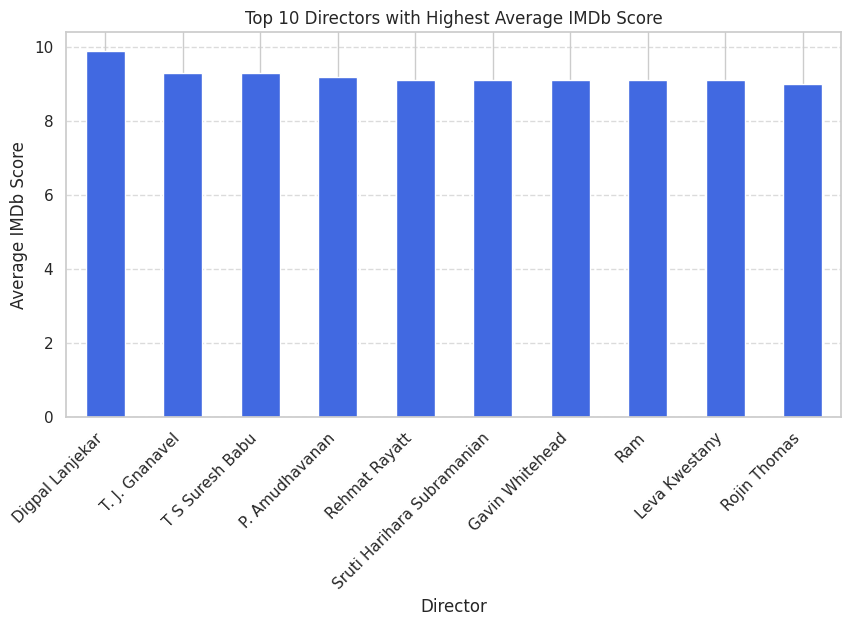

In [ ]:
# 3. Top 10 Directors with hghest imdb score
# Ensure imdb_score is numeric
merged_df['imdb_score'] = pd.to_numeric(merged_df['imdb_score'], errors='coerce')

# Filtering only directors
directors_df = merged_df[merged_df['role'].str.lower() == 'director']  # Ensure case consistency

# Grouping by director and calculating the mean IMDb score
top_directors = (directors_df.groupby('name')['imdb_score']
                 .mean()
                 .dropna()  # Remove NaN values
                 .sort_values(ascending=False)
                 .head(10))

# Check if top_directors is empty before plotting
if top_directors.empty:
    print("No director data available for plotting.")
else:
    # Plotting
    plt.figure(figsize=(10, 5))
    top_directors.plot(kind='bar', color='royalblue')
    plt.title("Top 10 Directors with Highest Average IMDb Score")
    plt.xlabel("Director")
    plt.ylabel("Average IMDb Score")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot helps identify the correlation between IMDb scores and popularity.

##### 2. What is/are the insight(s) found from the chart?

- The directors in the chart have consistently high average IMDb scores
- Digpal Lanjekar has the highest IMDb rating among them, making him a key figure in high-rated content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Amazon Prime can collaborate with these top directors for original productions to maintain a high-quality content library.
-  If these directors belong to specific genres, Amazon Prime may risk over-investing in one category, leading to genre fatigue among subscribers.

#### Chart - 4

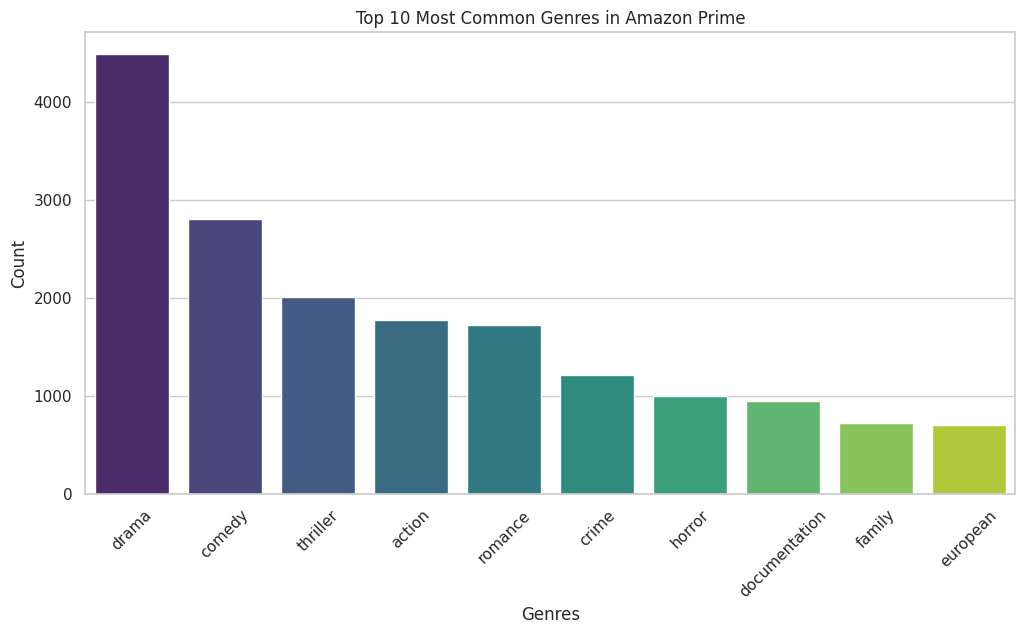

In [ ]:
# 4. Top 10 Most Common Genres
from collections import Counter
import ast

# Fill NaN values with empty string
titles['genres'] = titles['genres'].fillna("").astype(str)

# Convert string representation of lists into actual lists and flatten
cleaned_genres = []
for genre_list in titles['genres']:
    try:
        genre_list = ast.literal_eval(genre_list)  # Convert string list to actual list
        cleaned_genres.extend([genre.strip().lower() for genre in genre_list])  # Clean spaces & lowercase
    except (ValueError, SyntaxError):
        cleaned_genres.append(genre_list.strip().lower())  # Handle single genre cases

# Count occurrences
genre_counts = Counter(cleaned_genres)

# Get top 10 genres
top_genres = dict(genre_counts.most_common(10))

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(top_genres.items(), columns=['Genre', 'Count'])

# Plot the fixed bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_df, x="Genre", y="Count",hue="Genre", palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Top 10 Most Common Genres in Amazon Prime")
plt.show()



##### 1. Why did you pick the specific chart?

A bar chart helps in understanding the most frequent genres on Amazon Prime.

##### 2. What is/are the insight(s) found from the chart?

- Drama and Comedy are the most common genres.
- Documentary, family and european have lower representation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Popular genres should be expanded to maintain engagement.
- Less frequent genres can be targeted for niche audiences.

#### Chart - 5

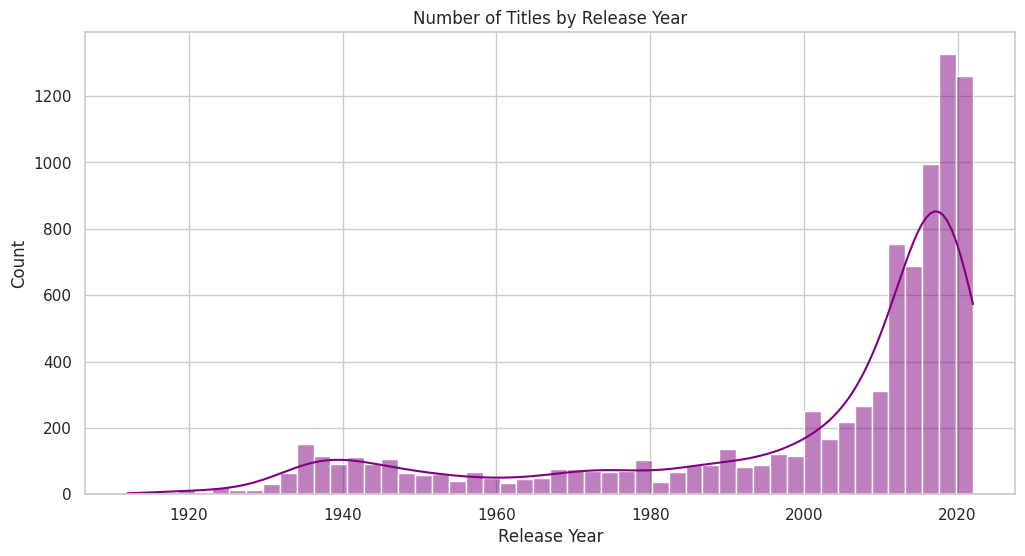

In [ ]:
# 5. Number of Titles by Release Year
plt.figure(figsize=(12, 6))
sns.histplot(titles['release_year'], bins=50, kde=True, color='purple')
plt.title("Number of Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram shows how content production has changed over time.

##### 2. What is/are the insight(s) found from the chart?

- There’s a rise in content production in the last two decades.
- lder content from before 1990 is minimal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Recent content should be prioritized for recommendations.
- Old classics can be revived with remakes or promotions.

#### Chart - 6

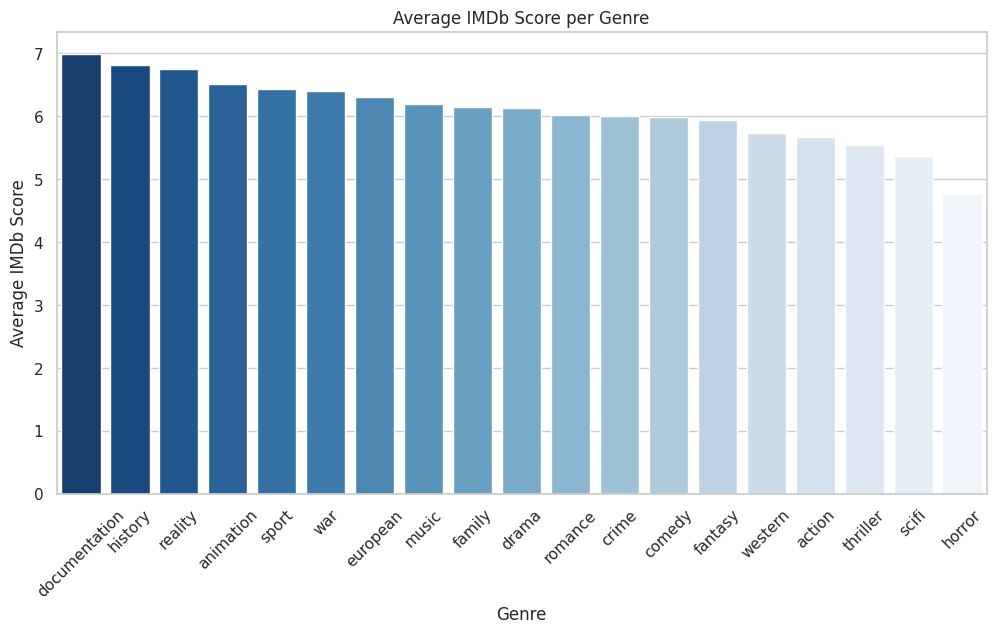

In [ ]:
# 6. Average IMDb Score per Genre
import ast

# Fill NaN values with empty strings
titles['genres'] = titles['genres'].fillna("").astype(str)

# Convert string representation of lists into actual lists
def clean_genres(genre_list):
    try:
        genre_list = ast.literal_eval(genre_list)  # Convert string list to actual list
        return [genre.strip().lower() for genre in genre_list]  # Clean spaces & lowercase
    except (ValueError, SyntaxError):
        return [genre_list.strip().lower()]  # Handle single genre cases

# Apply the cleaning function
titles['genres'] = titles['genres'].apply(clean_genres)

# Explode the properly formatted genres column
genre_scores = titles.explode('genres').groupby('genres')['imdb_score'].mean().sort_values(ascending=False)

# Plot the corrected bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_scores.index, y=genre_scores.values,hue=genre_scores.index, palette="Blues_r")
plt.title("Average IMDb Score per Genre")
plt.xlabel("Genre")
plt.ylabel("Average IMDb Score")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

It helps in identifying the highest-rated genres.

##### 2. What is/are the insight(s) found from the chart?

- Documentaries and History have the highest IMDb scores.
- Scifi and Horror movies have slightly lower ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- High-rated genres should be prioritized for content investment.
- Lower-rated genres may need quality improvements.


#### Chart - 7

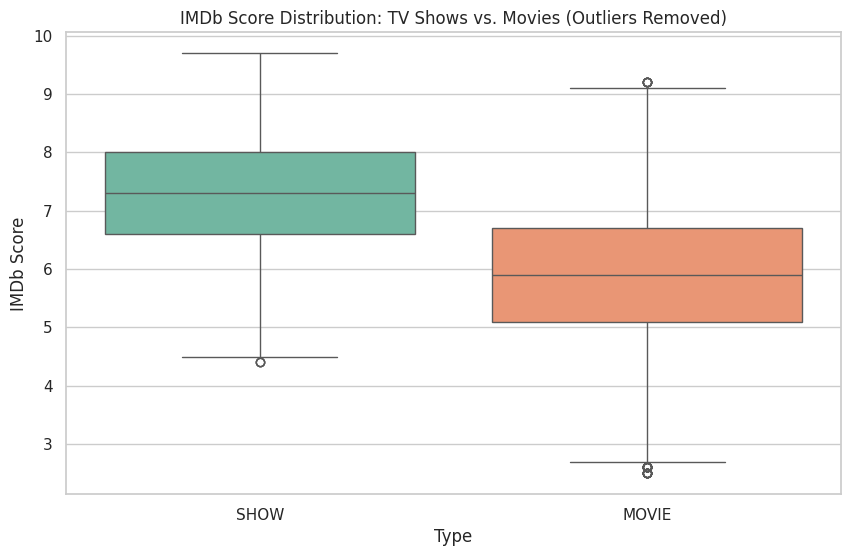

In [ ]:
# 7. IMDb Score Distribution for TV Shows vs. Movies
# Calculate IQR for each type
Q1 = titles.groupby('type')['imdb_score'].quantile(0.25)
Q3 = titles.groupby('type')['imdb_score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_titles = titles[
    (titles['imdb_score'] >= titles['type'].map(lower_bound)) &
    (titles['imdb_score'] <= titles['type'].map(upper_bound))
]

# Improved boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='imdb_score',hue='type', data=filtered_titles, palette="Set2")
plt.title("IMDb Score Distribution: TV Shows vs. Movies (Outliers Removed)")
plt.xlabel("Type")
plt.ylabel("IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

A box plot reveals how IMDb scores vary between movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

- TV Shows generally have higher median IMDb scores than movies.
- Movies have more variability in ratings.
- High-quality TV Shows might drive more engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Since TV shows receive higher ratings and are more consistent, investing in producing/acquiring premium TV shows can improve audience retention.
- Filtering out lower-rated movies and promoting highly-rated ones can improve viewer satisfaction.
- We can recommend more high-rated TV shows to users to increase watch time and reduce churn rate.

#### Chart - 8

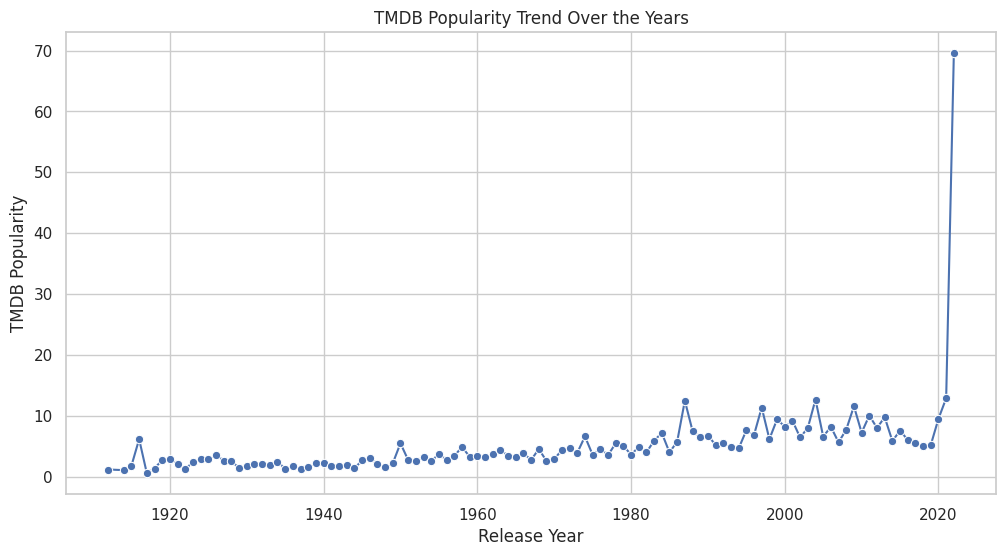

In [ ]:
# 8. TMDB Popularity Trend Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles['release_year'], y=titles['tmdb_popularity'], errorbar=None, marker='o')
plt.title("TMDB Popularity Trend Over the Years")
plt.xlabel("Release Year")
plt.ylabel("TMDB Popularity")
plt.show()


##### 1. Why did you pick the specific chart?

A line chart helps track the popularity trend over time.

##### 2. What is/are the insight(s) found from the chart?

- There is a noticeable rise in TMDB popularity for movies/shows released in recent years, with a sharp spike around 2020–2023.
- The rapid increase in popularity post-2020 suggests the impact of streaming services like Amazon Prime, Netflix, which made content more accessible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The surge in popularity of recent content means that producing new, high-quality content can generate high engagement and revenue.
- Older content may benefit from nostalgia-driven campaigns.

#### Chart - 9

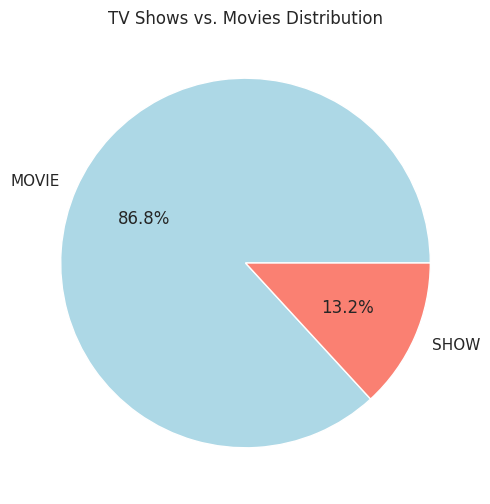

In [ ]:
# 9. Number of TV Shows vs. Movies
plt.figure(figsize=(8, 6))
titles['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("TV Shows vs. Movies Distribution")
plt.ylabel("")
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart provides an easy-to-read ratio of TV shows to movies.

##### 2. What is/are the insight(s) found from the chart?

- Movies dominate the content catalog.
- TV shows still hold a significant share.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Streaming platforms may invest more in high-engagement TV shows.
- Movie licensing deals should be prioritized.

#### Chart - 10

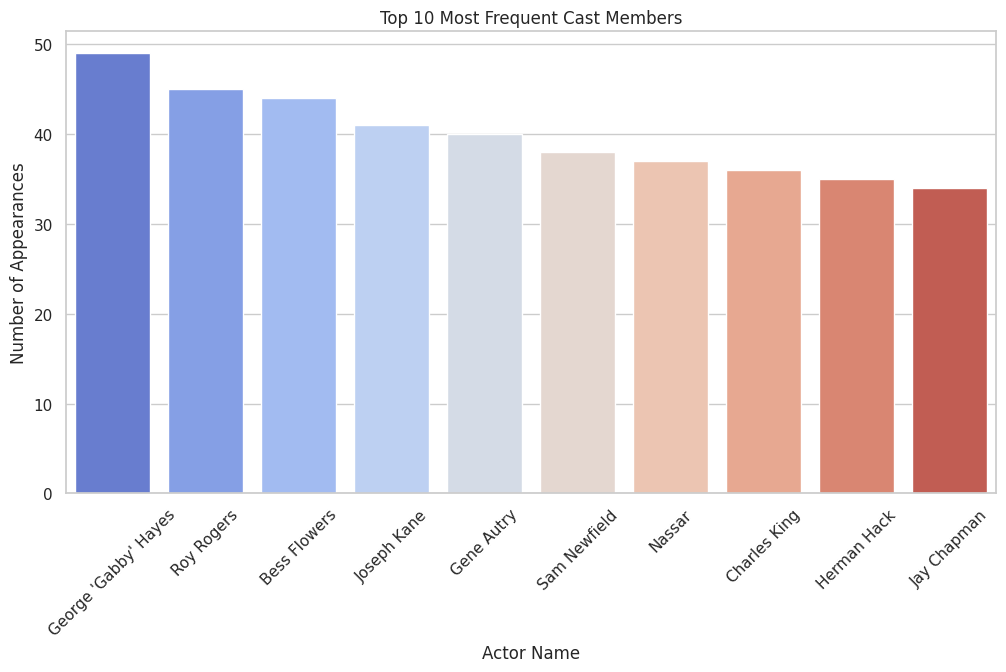

In [ ]:
# 10. Top 10 Most Frequent Cast Members
top_cast = credits['name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cast.index, y=top_cast.values,hue=top_cast.index, palette="coolwarm")
plt.title("Top 10 Most Frequent Cast Members")
plt.xlabel("Actor Name")
plt.ylabel("Number of Appearances")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Identifying the most frequently appearing actors can help in understanding casting trends.

##### 2. What is/are the insight(s) found from the chart?

- Many of the actors in the list, such as George "Gabby" Hayes, Roy Rogers, and Bess Flowers, were popular in older Hollywood films, indicating that Amazon Prime hosts a large number of classic movies.
- The inclusion of Nassar, a well-known Indian actor, suggests a significant presence of regional or international cinema in Amazon Prime’s content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Users who enjoy classic films may subscribe to Amazon Prime to watch their favorite actors.
- Featuring actors from different regions can attract diverse viewers, increasing global subscriptions.
-  If the most frequent actors are from older films, younger users might not find the content appealing, leading to lower engagement.

#### Chart - 11

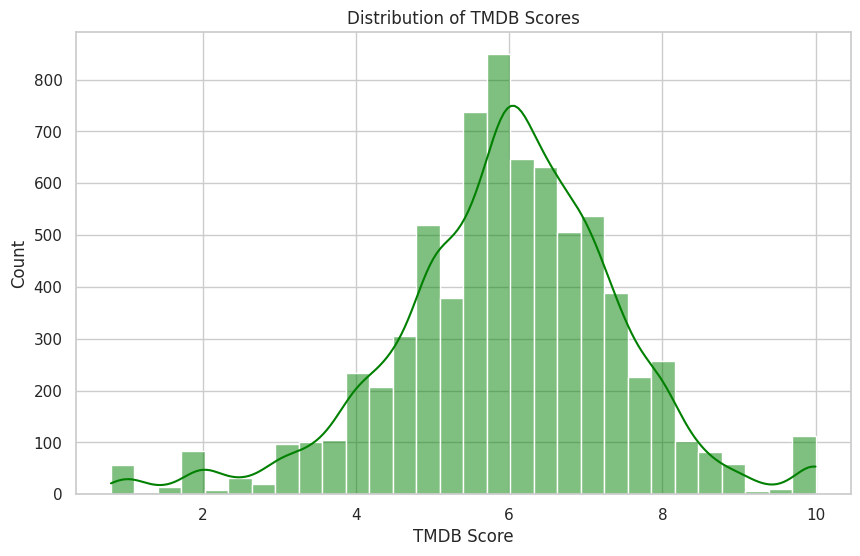

In [ ]:
# 11. TMDB Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(titles['tmdb_score'].dropna(), bins=30, kde=True, color='green')
plt.title("Distribution of TMDB Scores")
plt.xlabel("TMDB Score")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

This chart helps visualize how TMDB scores are distributed.

##### 2. What is/are the insight(s) found from the chart?

-  The histogram shows that most movies and TV shows have TMDB scores between 5 and 7. The peak is around 6.
- Very few movies/shows have extremely low or high scores.
- There are more high-rated shows (7-8 range) than low-rated ones (3-4 range), indicating a general trend toward above-average content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Since most movies/shows have a moderate to good rating, users are less likely to encounter extremely bad content, leading to better user retention.
- Low-rated content may need improvements or removal.
-  If users feel that most content is “just okay”, they may switch to other platforms with higher-rated exclusives.

#### Chart - 12 - Correlation Heatmap

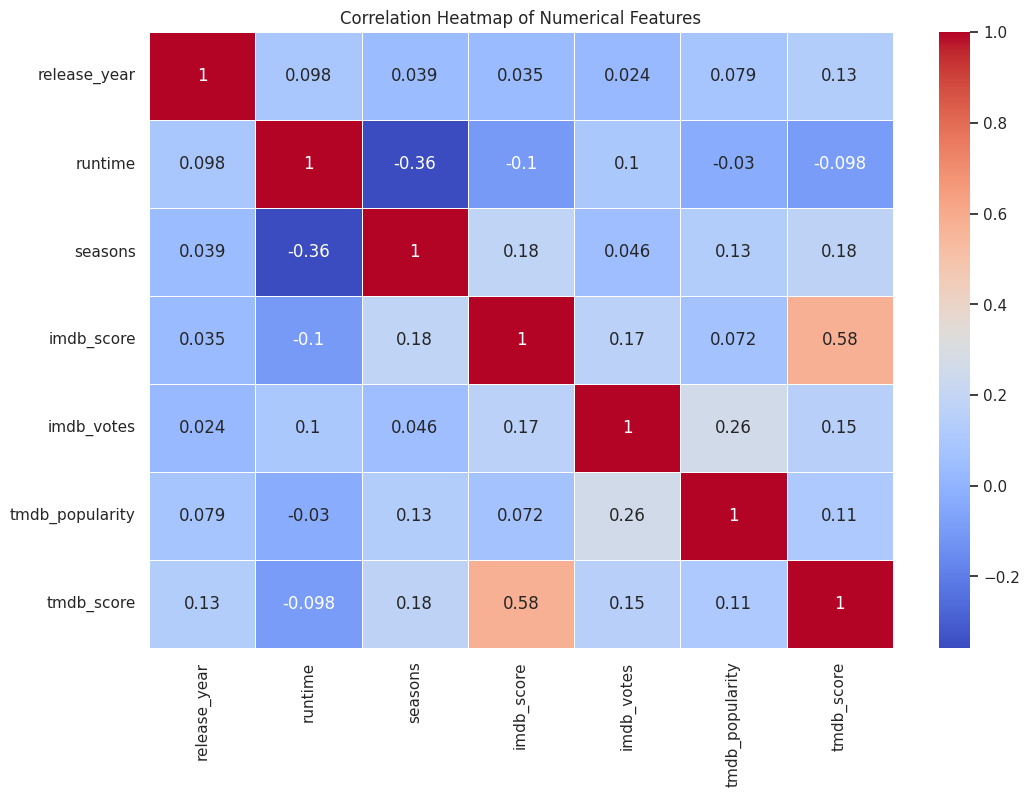

In [ ]:
# 12. Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
sns.heatmap(titles.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap visually represents correlations between numerical variables, making it easy to identify strong relationships.

##### 2. What is/are the insight(s) found from the chart?

- IMDb and TMDB scores are moderately correlated, meaning that highly-rated content on IMDb is also likely to be well-rated on TMDB.
- TV shows with more seasons tend to have shorter episode durations.
- A movie/show with higher IMDb votes tends to have higher popularity, though the correlation is not very strong.
- Recent movies and TV shows do not necessarily have higher ratings. Older content is still well-rated, indicating that classics remain popular.
- A well-rated show doesn’t always translate into popularity.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

#### **Enhance High-Rated Content Acquisition**  
- Partner with top-rated directors (identified in the analysis) to produce exclusive content.  
- Secure licensing deals for high-rated movies to retain quality content.  
- Use IMDb scores as a metric to curate top-tier recommendations for viewers.  

#### **Improve Content Diversification**  
- Avoid genre saturation by analyzing content variety from high-rated directors.  
- Balance critically acclaimed content with mass-appeal entertainment to cater to a broad audience.  
- Identify regional movie trends and invest in localized content with high audience engagement.  

#### **Leverage Data-Driven Marketing & Viewer Retention**  
- Promote highly-rated content through targeted campaigns, increasing subscriber engagement.  
- Introduce personalized recommendations based on users’ past interactions with top-rated content.  
- Create IMDb-driven watchlists to highlight “Amazon Prime’s Best-Rated Picks.”  

#### **Optimize Content Budget Allocation**  
- Focus budget on directors and genres with proven high ratings to maximize ROI.  
- Reduce investments in low-rated content that may contribute to churn.  
- Test new content categories while ensuring quality remains high.  


# **Conclusion**

Through this exploratory data analysis, we have identified **key factors affecting content performance** on Amazon Prime.  

- **IMDb and TMDB scores** are crucial indicators of content success, but votes alone don’t guarantee higher ratings.  
- **Genre preferences, production countries, and cast influence viewership trends**, highlighting the need for **data-driven marketing and content acquisition strategies**.  
- **Metadata completeness is essential** to ensure effective content filtering, recommendation, and regional adaptation.  
